## notMNIST

notMNIST dataset consist of 10 classes. Each image is a letter(from A-J). Following are examples of letter "A"

![Alt text](./images/cnn_implement/notmnist.png)

more reference
https://leemeng.tw/simple-image-recognition-using-notmnist-dataset.html

We first download dataset. Following is download script.

In [1]:
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle

pickle_file = 'notMNIST.pickle' # 已經整理好的python dataset

with open(pickle_file, 'rb') as f:
    save = pickle.load(f, encoding='latin1')
    train_dataset = save['train_dataset']
    train_labels = save['train_labels']
    test_dataset = save['test_dataset']
    test_labels = save['test_labels']
    del save  # free up memory
    print('Training set', train_dataset.shape, train_labels.shape)
    print('Test set', test_dataset.shape, test_labels.shape)
    


Training set (200000, 28, 28) (200000,)
Test set (10000, 28, 28) (10000,)


*************** 4


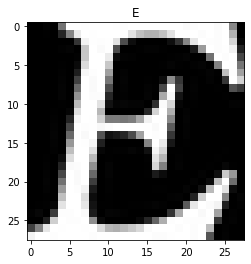

In [2]:
# 畫一張
import matplotlib.pyplot as plt
%matplotlib inline
# 做一個字典將0~9 對應到 A~J
lookup_labels = {k: v for (k, v) in zip(np.arange(10), 'ABCDEFGHIJ')}
# plt.figure(figsize=(3/4, 3/4))
print('*'*15, train_labels[0])
plt.imshow(train_dataset[0], cmap='gray')
plt.title(lookup_labels[train_labels[0]])
plt.show()


In [3]:
# 資料前處理
# # 特徵縮放Ｘ－－＞　（０，１）
# #獨熱編碼ｙ－－＞ [0000010000]
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test_label = to_categorical(test_labels)

In [4]:
train_labels[0],y_train[0]

(4, array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))

In [5]:
# 建立一個約有 10~100 萬個參數的「小型」神經網路
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # 攤平成784當作input
    tf.keras.layers.Dense(500,activation = 'relu'),
    tf.keras.layers.Dense(250, activation = 'relu'),
    tf.keras.layers.Dense(10,  activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2510      
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [6]:
#編譯模型 model.compile
# 若label未做獨熱編碼, loss function可用 sparse_categorical_crossentropy
model.compile(loss = 'categorical_crossentropy' , optimizer = 'Adam', metrics = ['accuracy'])

import numpy as np
x_train = train_dataset.astype(np.float32)/255.0#如果分數不高 可以除以255讓他平均化
x_test = test_dataset.astype(np.float32)/255.0

In [7]:
# 訓練模型 model.fit
history = model.fit(x_train,y_train ,batch_size = 200, epochs = 10, validation_split = 0.1,verbose = 1)

Epoch 1/10
900/900 [==============================] - 11s 12ms/step - loss: 0.7433 - accuracy: 0.7975 - val_loss: 0.5457 - val_accuracy: 0.8414
Epoch 2/10
900/900 [==============================] - 10s 12ms/step - loss: 0.5083 - accuracy: 0.8491 - val_loss: 0.4805 - val_accuracy: 0.8554
Epoch 3/10
900/900 [==============================] - 11s 13ms/step - loss: 0.4548 - accuracy: 0.8631 - val_loss: 0.4458 - val_accuracy: 0.8645
Epoch 4/10
900/900 [==============================] - 13s 14ms/step - loss: 0.4169 - accuracy: 0.8743 - val_loss: 0.4173 - val_accuracy: 0.8744
Epoch 5/10
900/900 [==============================] - 11s 12ms/step - loss: 0.3866 - accuracy: 0.8831 - val_loss: 0.3935 - val_accuracy: 0.8804s: 0.3866 - accuracy: 0.
Epoch 6/10
900/900 [==============================] - 10s 12ms/step - loss: 0.3614 - accuracy: 0.8908 - val_loss: 0.3748 - val_accuracy: 0.8860
Epoch 7/10
900/900 [==============================] - 11s 12ms/step - loss: 0.3405 - accuracy: 0.8968 - val_loss

In [10]:
#評估模型的結果 evaluate model train & test 
model.evaluate(x_test,y_test_label )

313/313 [==============================] - 1s 4ms/step - loss: 0.1653 - accuracy: 0.9495


[0.16531550884246826, 0.9495000243186951]

In [11]:
# model history plot
# 存模型參數
model.save('text_model.h5')

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from os.path import splitext # 將檔案名稱與副檔名分離
from glob import glob # 多檔案一起執行


In [13]:
jpglist = glob('./homework//*.[jJ][pP][gG]')
print(jpglist)

['./homework\\A.jpg', './homework\\B.jpg', './homework\\C.jpg', './homework\\D.jpg', './homework\\E.jpg', './homework\\F.jpg', './homework\\G.jpg', './homework\\H.jpg', './homework\\I.jpg', './homework\\J.jpg']


A <class 'str'>


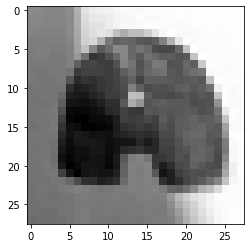

B <class 'str'>


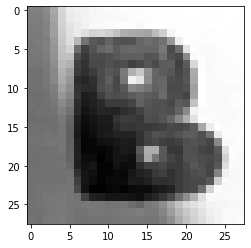

C <class 'str'>


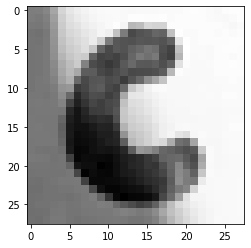

D <class 'str'>


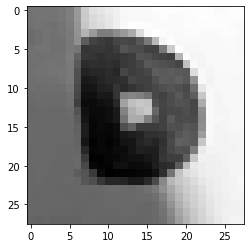

E <class 'str'>


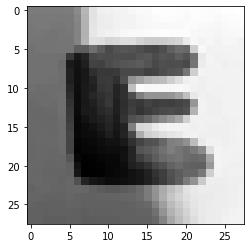

F <class 'str'>


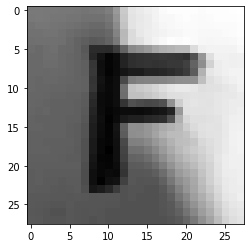

G <class 'str'>


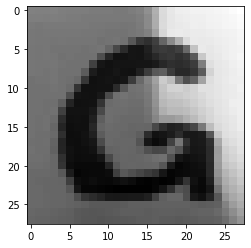

H <class 'str'>


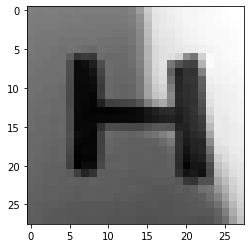

I <class 'str'>


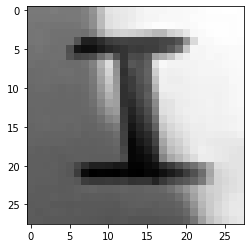

J <class 'str'>


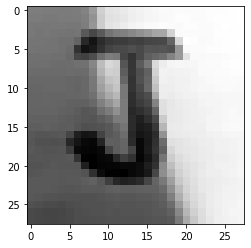

In [15]:
for i in jpglist:
    im = Image.open(i).convert('L')#轉灰階
    im2 = im.resize((28,28)) # 改為 28 x28
#     im3 = im2.rotate(-90) # 旋轉
    label = i[-5:-4] # 從檔名去把 label 擷取出來
    print(label, type(label))
    test_graph = np.array(im2)
    plt.imshow(test_graph,cmap='gray')
    plt.show()


['./homework\\A.jpg', './homework\\B.jpg', './homework\\C.jpg', './homework\\D.jpg', './homework\\E.jpg', './homework\\F.jpg', './homework\\G.jpg', './homework\\H.jpg', './homework\\I.jpg', './homework\\J.jpg']
A <class 'str'>


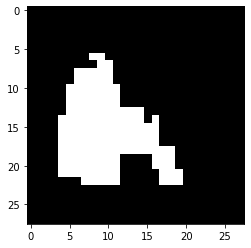

B <class 'str'>


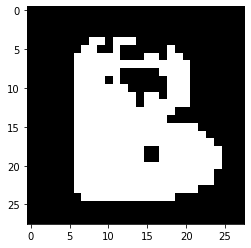

C <class 'str'>


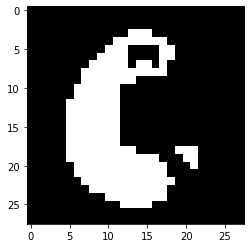

D <class 'str'>


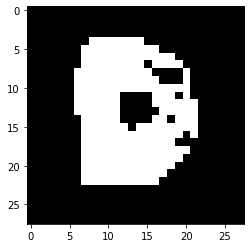

E <class 'str'>


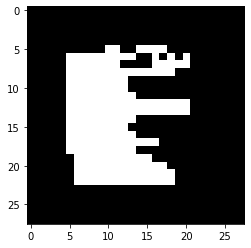

F <class 'str'>


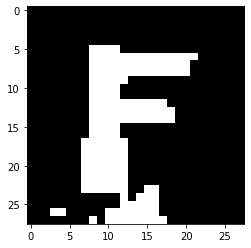

G <class 'str'>


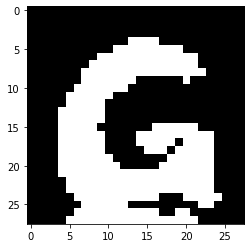

H <class 'str'>


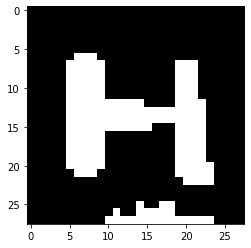

I <class 'str'>


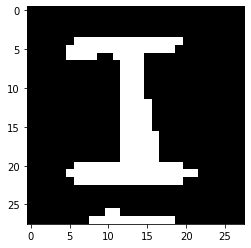

J <class 'str'>


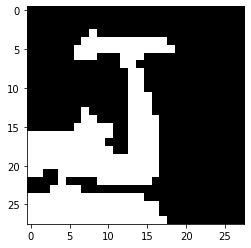

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from os.path import splitext # 將檔案名稱與副檔名分離
from glob import glob # 多檔案一起執行
jpglist = glob('./homework/*.[jJ][pP][gG]')
print(jpglist)
# 連續轉檔
for i in jpglist:
    im = Image.open(i).convert('L')#轉灰階
    im2 = im.resize((28,28)) # 改為 28 x28
    label = i[-5:-4] # 從檔名去把 label 擷取出來
    print(label, type(label))
    hold = 100
    table = []
    for j in range(256):
        if j < hold:
            table.append(1)
        else:
            table.append(0)
    bim = im2.point(table,'1')#轉成二值圖片
    
    test_graph = np.array(bim)
    bim.save('./homework/out'+'\\'+label+'.jpg')
    plt.imshow(test_graph,cmap='gray')
    plt.show()

In [34]:
import tensorflow as tf
model = tf.keras.models.load_model('text_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2510      
Total params: 520,260
Trainable params: 520,260
Non-trainable params: 0
_________________________________________________________________


In [51]:
im1=Image.open('./homework/out/D.jpg')
im1

In [53]:
test_graph = np.array(im1)/255.0 # notMNIST要除以255.0減去0.5 --> (0.5~-0.5)
result = model.predict(test_graph.reshape(-1,28,28).astype(np.float32))
print(np.argmax(result))

8
